In [1]:
import random
import math
import matplotlib.pyplot as plt

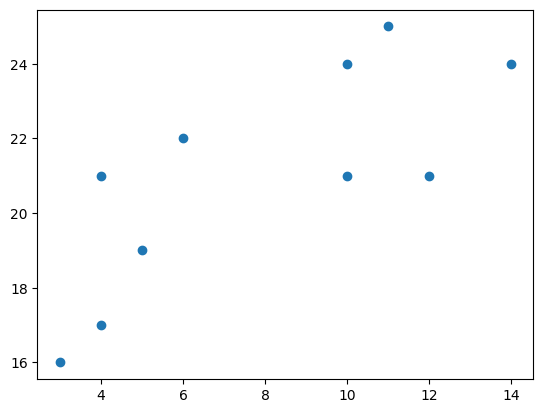

In [2]:
# Chuẩn bị dữ liệu mẫu
x=[4,5,10,4,3,11,14,6,10,12]
y=[21,19,24,17,16,25,24,22,21,21]
# Biểu diễn nó lên biểu đồ phân tán
plt.scatter(x,y)
plt.show()

In [3]:
# Tính khoảng cách Euclidean giữa hai điểm
def euclidean_distance(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))


In [4]:
# Gán mỗi điểm dữ liệu vào cụm gần nhất
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid = distances.index(min(distances))
        clusters[closest_centroid].append(point)
    return clusters


In [5]:
# Tính tổng sai số bình phương (SSE)
def compute_sse(clusters, centroids):
    sse = 0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            sse += euclidean_distance(point, centroids[i]) ** 2
    return sse


In [6]:
# Tính tâm cụm mới
def compute_centroids(clusters):
    centroids = []
    for cluster in clusters:
        if len(cluster) > 0:
            centroid = [sum(dim) / len(cluster) for dim in zip(*cluster)]
        else:
            centroid = [0] * len(clusters[0][0])  # Tránh cụm rỗng
        centroids.append(centroid)
    return centroids


In [7]:
# Thuật toán K-means
def kmeans(data, k, max_iterations=1000, tolerance=1e-4):
    # Khởi tạo ngẫu nhiên k tâm cụm
    centroids = random.sample(data, k)
    for _ in range(max_iterations):
        # Gán điểm dữ liệu vào cụm gần nhất
        clusters = assign_clusters(data, centroids)
        
        # Tính lại tâm cụm
        new_centroids = compute_centroids(clusters)
        
        # Kiểm tra điều kiện hội tụ
        differences = [euclidean_distance(c, nc) for c, nc in zip(centroids, new_centroids)]
        if max(differences) < tolerance:
            break
        
        centroids = new_centroids

    return clusters, centroids


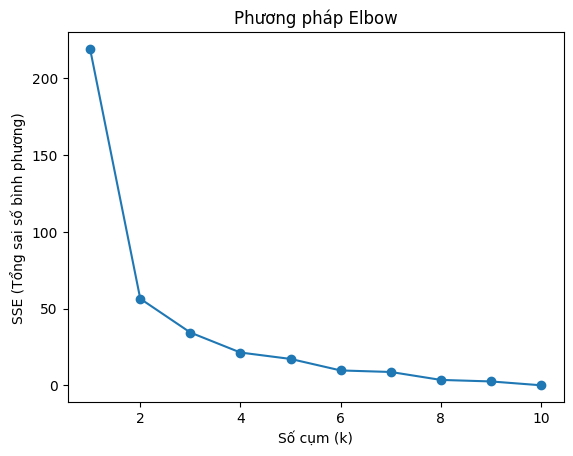

In [8]:
x=[4,5,10,4,3,11,14,6,10,12]
y=[21,19,24,17,16,25,24,22,21,21]
data = list(zip(x, y))
# Phát hiện số cụm tối ưu với phương pháp Elbow
sse_values = []
k_values = range(1, 11)  # Kiểm tra từ k=1 đến k=10

for k in k_values:
    clusters, centroids = kmeans(data, k)
    sse = compute_sse(clusters, centroids)
    sse_values.append(sse)

# Vẽ đồ thị Elbow
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE (Tổng sai số bình phương)')
plt.title('Phương pháp Elbow')
plt.show()

In [9]:
x=[4,5,10,4,3,11,14,6,10,12]
y=[21,19,24,17,16,25,24,22,21,21]
data = list(zip(x, y))
# Chạy thuật toán K-means với k=2
k = 2
clusters, centroids = kmeans(data, k)

# Kết quả
print("Tâm cụm cuối cùng:")
for i, centroid in enumerate(centroids):
    print(f"Cụm {i + 1}: {centroid}")

print("\nCác cụm:")
for i, cluster in enumerate(clusters):
    print(f"Cụm {i + 1}: {cluster}")

Tâm cụm cuối cùng:
Cụm 1: [11.4, 23.0]
Cụm 2: [4.4, 19.0]

Các cụm:
Cụm 1: [(10, 24), (11, 25), (14, 24), (10, 21), (12, 21)]
Cụm 2: [(4, 21), (5, 19), (4, 17), (3, 16), (6, 22)]


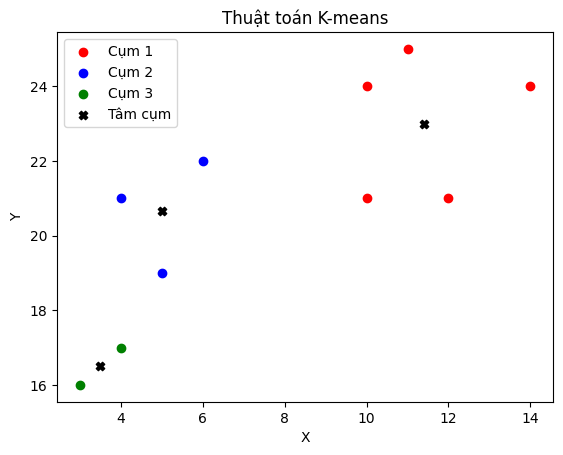

In [19]:
# Vẽ biểu đồ kết quả
colors = ['r', 'b', 'g', 'y', 'c', 'm']

# Vẽ các điểm dữ liệu
for i, cluster in enumerate(clusters):
    cluster_x, cluster_y = zip(*cluster)
    plt.scatter(cluster_x, cluster_y, color=colors[i], label=f'Cụm {i + 1}')

# Vẽ các tâm cụm
centroids_x, centroids_y = zip(*centroids)
plt.scatter(centroids_x, centroids_y, color='black', marker='X', label='Tâm cụm')

# Hiển thị biểu đồ
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Thuật toán K-means')
plt.legend()
plt.show()


In [11]:
k=3
clusters, centroids = kmeans(data, k)

# Kết quả
print("Tâm cụm cuối cùng:")
for i, centroid in enumerate(centroids):
    print(f"Cụm {i + 1}: {centroid}")

print("\nCác cụm:")
for i, cluster in enumerate(clusters):
    print(f"Cụm {i + 1}: {cluster}")

Tâm cụm cuối cùng:
Cụm 1: [11.4, 23.0]
Cụm 2: [5.0, 20.666666666666668]
Cụm 3: [3.5, 16.5]

Các cụm:
Cụm 1: [(10, 24), (11, 25), (14, 24), (10, 21), (12, 21)]
Cụm 2: [(4, 21), (5, 19), (6, 22)]
Cụm 3: [(4, 17), (3, 16)]


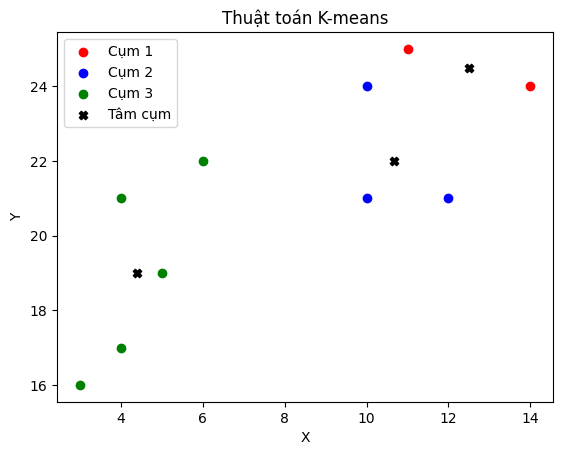

In [22]:
k = 3
clusters, centroids = kmeans(data, k)
# Vẽ biểu đồ kết quả
colors = ['r', 'b', 'g', 'y', 'c', 'm']

# Vẽ các điểm dữ liệu
for i, cluster in enumerate(clusters):
    cluster_x, cluster_y = zip(*cluster)
    plt.scatter(cluster_x, cluster_y, color=colors[i], label=f'Cụm {i + 1}')

# Vẽ các tâm cụm
centroids_x, centroids_y = zip(*centroids)
plt.scatter(centroids_x, centroids_y, color='black', marker='X', label='Tâm cụm')

# Hiển thị biểu đồ
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Thuật toán K-means')
plt.legend()